In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
class linear_regression:
  def __init__(self, lr = 1e-6, repeats = 100000):
    self.lr = lr
    self.repeats = repeats
    self.costs = []
    self.weight = None
    self.bias = None
  def fit(self, X, Y):

    m = X.shape[0]
    n = X.shape[1]


    self.weight = np.zeros((n, 1))
    self.bias = 0

    for repeat in range(0, self.repeats):

      y_hat = np.dot(X, self.weight) + self.bias
      Y = Y.reshape(m, 1)
      loss = y_hat - Y

      cost = np.sum(loss ** 2) / (m * 2)
      self.costs.append(cost)

      db = np.sum(loss) / m
      dw = np.dot(X.T, loss) / m

      self.weight -= (self.lr) * dw
      self.bias -= (self.lr) * db

  def predict(self, X):
    self.y_predict =  np.dot(X, self.weight) + self.bias
    return self.y_predict

  def get_pharameter(self):
    return f"this is wight{self.weight} and this bias {self.bias}"

  def MSE(self, y):
    loss_predict = self.predict - y
    mse = np.sum(loss_predict ** 2) / y.shape[0]
    return mse
  def show_costs(self):
    plt.plot(self.costs)

In [67]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')
X, y = boston.data, boston.target
X = X.astype('int')
X = np.array(X)
y = np.array(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [68]:
model = linear_regression()
model.fit(X_train, y_train)

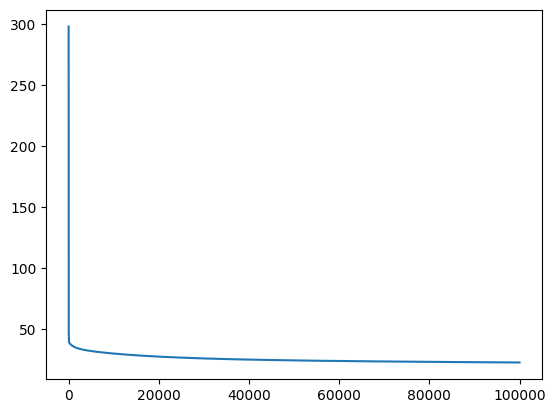

In [69]:
model.show_costs()